#### TBL456 Keşif aktivitesi-4: pandas & gorsellestirme

## İsim/Soyisim:Muhammet Sercan Oruç
## Öğrenci Numarası:161307008
## E-mail:m.sercanoruc@gmail.com
## Kullanılan dataset adı: Graduate Admission 2
## Dataset url: https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv

In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

import warnings
warnings.filterwarnings("ignore")

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial-No.          500 non-null int64
GREScore            500 non-null int64
TOEFLScore          500 non-null int64
UniversityRating    500 non-null int64
SOP                 500 non-null float64
LOR                 500 non-null float64
CGPA                500 non-null float64
Research            500 non-null int64
ChanceofAdmit       500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Serial No. sütununu kaldırdım

In [75]:
data.drop(["Serial-No."],axis=1, inplace= True)
data

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


1-)Correlation map

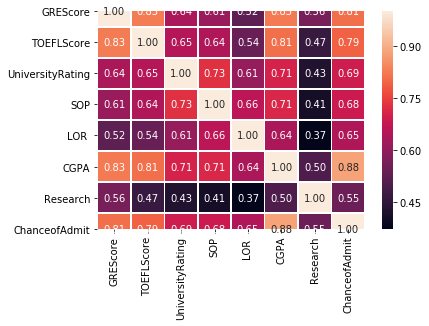

In [76]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show()

2-)Araştırma Deneyimi olan ve olmayan kişilerin toefl ve greScoreları scatter plot grafigi

In [77]:
deneyimli=data[data.Research == 1]
deneyimsiz = data[data.Research ==0]

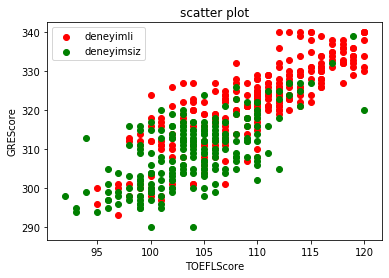

In [78]:
plt.scatter(deneyimli.TOEFLScore , deneyimli.GREScore , color="red",label="deneyimli" )
plt.scatter(deneyimsiz.TOEFLScore , deneyimsiz.GREScore , color="green",label="deneyimsiz" )
plt.legend()
plt.xlabel("TOEFLScore")
plt.ylabel("GREScore")
plt.title("scatter plot")
plt.show()

3-) 5 üzerinden Üniversite Puanı ve 10 üzerinden lisans not ortalaması

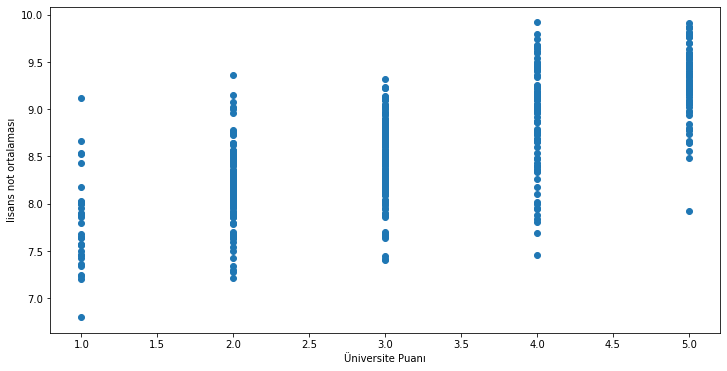

In [79]:
plt.figure(figsize=(12,6))

plt.scatter(data.UniversityRating,data.CGPA) 

plt.xlabel("Üniversite Puanı")

plt.ylabel("lisans not ortalaması")
plt.show()

4-) özelliklerin kutu grafiği üzerinde min max medyan değerleri

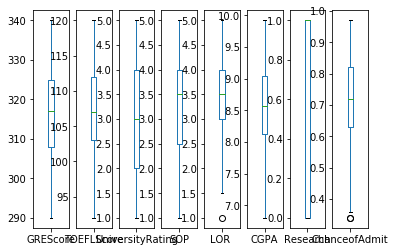

In [80]:
data.plot(kind="box", subplots=True, sharex=False, sharey=False)
plt.show()

5-)kabul durumunun lisans not ortalamasına oranı

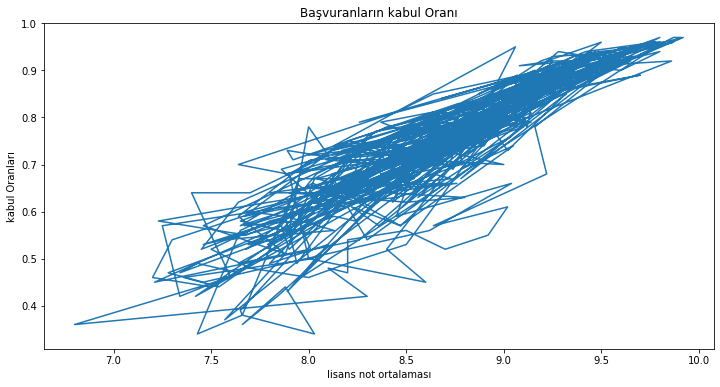

In [83]:
plt.figure(figsize=(12,6))

plt.plot(data.CGPA,data.ChanceofAdmit) #biz belirlemediğimiz sürece rengi otomatik kendisi verir. 

plt.title("Başvuranların kabul Oranı")

plt.xlabel("lisans not ortalaması")

plt.ylabel("kabul Oranları")
plt.show()

6-)Toefl ve gre scoreları kabul durumu görselleştirmesi

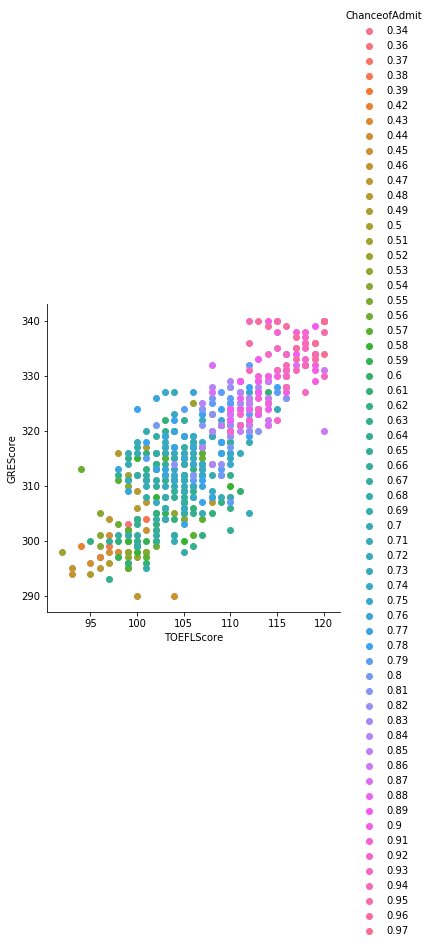

In [86]:
sns.FacetGrid(data, hue="ChanceofAdmit", size=5) \
   .map(plt.scatter, "TOEFLScore", "GREScore") \
   .add_legend()
plt.show()

7-) Tavsiye mektubu ve Lisans not ortalamaları kabul Oranları 2 grafikte gösterimi

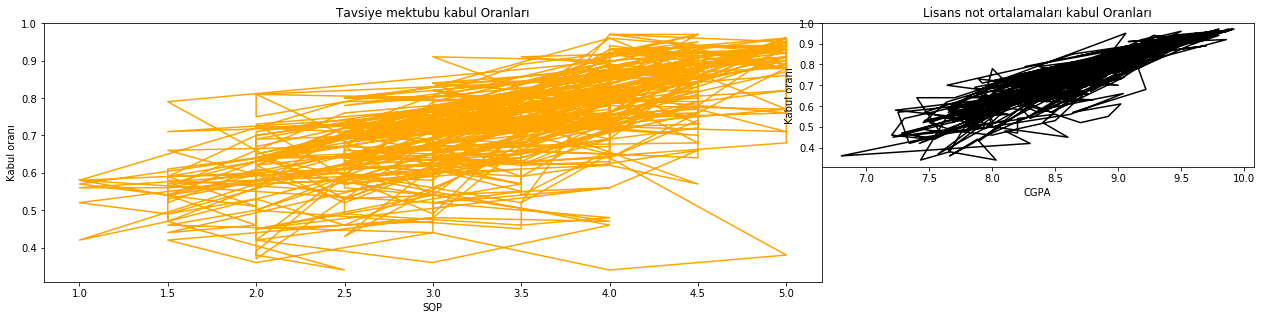

In [93]:
f=plt.figure(figsize=(12,4)) 


axes1=f.add_axes([0.1,0.1,0.9,0.9]) 

axes2=f.add_axes([1.0,0.5,0.5,0.5])


axes1.plot(data.SOP,data.ChanceofAdmit,color="orange")

axes2.plot(data.CGPA,data.ChanceofAdmit,color="black")

axes1.set_xlabel("SOP")
axes2.set_xlabel("CGPA")

axes1.set_ylabel("Kabul oranı")
axes2.set_ylabel("Kabul oranı")

axes1.set_title("Tavsiye mektubu kabul Oranları")
axes2.set_title("Lisans not ortalamaları kabul Oranları")

plt.show()